
# Tiny ML on Smart Insole
## Gait recognition



## Setup Python Environment

The next cell sets up the dependencies in required for the notebook, run it.

In [ ]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
#!pip install tensorflow==2.0.0

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import datasets, layers, models

import tensorflow as tf
from tensorflow import keras
#from sklearn.metrics import confusion_matrix

import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

print("TensorFlow version: ", tf.__version__)

# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `#_L.csv` and `#_R.csv` files from your computer to the tab to upload them into colab.

# Graph Data (optional)

We'll graph the input files on two separate graphs, left insole and right insole.

In [ ]:


GESTURE_L_FILES =[
    "00_driving_L",
    "01_air_L",
    "02_seated_L",
    "03_stand_nomove_L",
    "04_uphill_L",
    "05_downhill_L",
    "06_upstair_L",
    "07_downstair_L",
    "08_treadmill_normal_4km_L"
]

GESTURE_R_FILES =[
    "00_driving_R",
    "01_air_R",
    "02_seated_R",
    "03_stand_nomove_R",
    "04_uphill_R",
    "05_downhill_R",
    "06_upstair_R",
    "07_downstair_R",
    "08_treadmill_normal_4km_R"
]



for file_index in range(9):


  filename = GESTURE_L_FILES[file_index] + ".csv"
  df = pd.read_csv("/content/" + filename)

  index = range(1, len(df['L_FSR1']) + 1)

  plt.rcParams["figure.figsize"] = (20,10)

  # Left Insole Data
  plt.plot(index, df['L_FSR1'], 'g.', label='L1', linestyle='solid', marker=',')
  plt.plot(index, df['L_FSR2'], 'b.', label='L2', linestyle='solid', marker=',')
  plt.plot(index, df['L_FSR3'], 'r.', label='L3', linestyle='solid', marker=',')
  plt.plot(index, df['L_FSR4'], 'c.', label='L4', linestyle='solid', marker=',')
  plt.plot(index, df['L_FSR5'], 'm.', label='L5', linestyle='solid', marker=',')
  plt.plot(index, df['L_FSR6'], 'y.', label='L6', linestyle='solid', marker=',')
  plt.plot(index, df['L_FSR7'], 'k.', label='L7', linestyle='solid', marker=',')
  plt.plot(index, df['L_FSR8'], '#ff7f0e', label='L8', linestyle='solid', marker=',')

  plt.title("Left Insole")
  plt.xlabel("Sample #")
  plt.ylabel("Force (N)")
  plt.legend()
  plt.show()

  filename = GESTURE_R_FILES[file_index] + ".csv"
  df = pd.read_csv("/content/" + filename)

  index = range(1, len(df['R_FSR1']) + 1)

  plt.rcParams["figure.figsize"] = (20,10)
  # Right Insole Data
  plt.plot(index, df['R_FSR1'], 'g.', label='R1', linestyle='solid', marker=',')
  plt.plot(index, df['R_FSR2'], 'b.', label='R2', linestyle='solid', marker=',')
  plt.plot(index, df['R_FSR3'], 'r.', label='R3', linestyle='solid', marker=',')
  plt.plot(index, df['R_FSR4'], 'c.', label='R4', linestyle='solid', marker=',')
  plt.plot(index, df['R_FSR5'], 'm.', label='R5', linestyle='solid', marker=',')
  plt.plot(index, df['R_FSR6'], 'y.', label='R6', linestyle='solid', marker=',')
  plt.plot(index, df['R_FSR7'], 'k.', label='R7', linestyle='solid', marker=',')
  plt.plot(index, df['R_FSR8'], '#ff7f0e', label='R8', linestyle='solid', marker=',')

  plt.title("Right Insole")
  plt.xlabel("Sample #")
  plt.ylabel("Force (N)")
  plt.legend()
  plt.show()


# **1. 데이터 준비**
preprocessing





## Parse and prepare the data

> 들여쓴 블록



The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `GESTURES` list with the gesture data you've collected in `.csv` format.


In [ ]:
print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

DEVIDE_FACTOR = 10.0
num_epoch = 10

# 샘플수
SAMPLES_PER_GESTURE = 100
NUM_FSR = 16
TENSOR_CNT = 0

# the list of gestures that data is available for
GESTURES = [
    "driving",
    "air",
    "seated",
    "standing",
    "uphill",
    "downhill",
    "upstair",
    "downstair",
    "treadmill_normal",
]

GESTURE_L_FILES =[
    "00_driving_L",
    "01_air_L",
    "02_seated_L",
    "03_stand_nomove_L",
    "04_uphill_L",
    "05_downhill_L",
    "06_upstair_L",
    "07_downstair_L",
    "08_treadmill_normal_4km_L",
]

GESTURE_R_FILES =[
    "00_driving_R",
    "01_air_R",
    "02_seated_R",
    "03_stand_nomove_R",
    "04_uphill_R",
    "05_downhill_R",
    "06_upstair_R",
    "07_downstair_R",
    "08_treadmill_normal_4km_R",
]


NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []   # raw data
labels = []  # 정답 라벨..

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  #gesture = GESTURES[gesture_index]
  gesture_l = GESTURE_L_FILES[gesture_index]
  gesture_r = GESTURE_R_FILES[gesture_index]

  print(f"Processing index {gesture_index} for gesture '{GESTURES[gesture_index]}'.")

  # 정답 labels을 만들기 위해서....
  label = ONE_HOT_ENCODED_GESTURES[gesture_index]
  df_l = pd.read_csv("/content/" + gesture_l + ".csv")
  df_r = pd.read_csv("/content/" + gesture_r + ".csv")


  # calculate the number of gesture recordings in the file
  # 몇개의 데이터셋으로 분리 할 수 있는지 계산 (전체 데이터 / samples)
  l_num_recordings = int(df_l.shape[0] / SAMPLES_PER_GESTURE)
  print(f"\tThere are {l_num_recordings} recordings of the {gesture_l} gesture.")

  r_num_recordings = int(df_r.shape[0] / SAMPLES_PER_GESTURE)
  print(f"\tThere are {r_num_recordings} recordings of the {gesture_r} gesture.")

 # 왼쪽 vs. 오른쪽 중에서 작은 데이터를 가진 데이터 크기에 맞춰 전체 데이터 조절
  if l_num_recordings > r_num_recordings:
    num_recordings = r_num_recordings
  else:
    num_recordings = l_num_recordings

  print("\tthe number of dataset = " + str(num_recordings))

  TENSOR_CNT += num_recordings;

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j

      # normalize the input data, between 0 to 1:
      tensor += [
          (df_l['L_FSR1'][index] )/DEVIDE_FACTOR,
          (df_l['L_FSR2'][index] )/DEVIDE_FACTOR ,
          (df_l['L_FSR3'][index] )/DEVIDE_FACTOR ,
          (df_l['L_FSR4'][index] )/DEVIDE_FACTOR ,
          (df_l['L_FSR5'][index] )/DEVIDE_FACTOR ,
          (df_l['L_FSR6'][index] )/DEVIDE_FACTOR ,
          (df_l['L_FSR7'][index] )/DEVIDE_FACTOR ,
          (df_l['L_FSR8'][index] )/DEVIDE_FACTOR ,

          (df_r['R_FSR1'][index] )/DEVIDE_FACTOR,
          (df_r['R_FSR2'][index] )/DEVIDE_FACTOR ,
          (df_r['R_FSR3'][index] )/DEVIDE_FACTOR ,
          (df_r['R_FSR4'][index] )/DEVIDE_FACTOR ,
          (df_r['R_FSR5'][index] )/DEVIDE_FACTOR ,
          (df_r['R_FSR6'][index] )/DEVIDE_FACTOR ,
          (df_r['R_FSR7'][index] )/DEVIDE_FACTOR ,
          (df_r['R_FSR8'][index] )/DEVIDE_FACTOR

      ]
      # raw data --> [0.0, 0.023, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014000000000000002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.024, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.031, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.037, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.040999999999999995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.041999999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.044, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.053000000000000005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.076, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08399999999999999, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.089, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.089, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.087, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.073, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

    inputs.append(tensor) # raw data
    #labels.append(label) # 정답 labels
    labels.append(gesture_index) # 정답 labels

    # labels = [1. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0.] ...

# convert the list(리스트) to numpy array(배열)
inputs = np.array(inputs)    # 입력 데이터
labels = np.array(labels)  # 정답 labels


# 64Float --> 32FLOAT
inputs = inputs.astype(np.float32) / 1.0

#print(inputs)
#print(labels)

# Reshape
inputs = inputs.reshape((TENSOR_CNT, NUM_FSR, SAMPLES_PER_GESTURE, 1))
#inputs = inputs.reshape((TENSOR_CNT, NUM_FSR, SAMPLES_PER_GESTURE))

print(inputs)
print(labels)

print("Data set parsing and preparation complete.")

## Randomize and split the input and labels (answer) pairs for training

Randomly split input and labels (answer) pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [ ]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
# 전체 raw data를 랜덤하게 섞음
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
# 인덱스 삽입
inputs = inputs[randomize] # data
labels = labels[randomize] # 정답

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)             #훈련용 60%
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)#테스트용 20%

# 6:2:2로 데이터 나눔
training_inputs, test_inputs, validate_inputs = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])      # RAW DATA
training_labels, test_labels, validate_labels = np.split(labels, [TRAIN_SPLIT, TEST_SPLIT])  # 정답 labels

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


데이터 확인

In [ ]:
print(test_inputs[0].shape)
print(test_inputs[0])

# **2. 신경망 모델**

## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.



## Model 1 - Basic Model

In [ ]:
# build the model and train it
##### model 1
basic_model = tf.keras.Sequential()
basic_model.add(layers.Flatten(input_shape=(NUM_FSR, SAMPLES_PER_GESTURE, 1)))
basic_model.add(layers.Dense(64, activation='relu'))
basic_model.add(layers.Dense(128, activation='relu'))
basic_model.add(layers.Dropout(0.2))
basic_model.add(layers.Dense(32, activation='relu'))
basic_model.add(layers.Dense(9, activation='softmax'))

#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
basic_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

basic_history = basic_model.fit(training_inputs, training_labels, epochs=num_epoch, batch_size=1, validation_data=(validate_inputs, validate_labels))

## Model 2 - Extended Model

In [ ]:
##### model 2
extended_model = tf.keras.Sequential()
extended_model.add(layers.Flatten(input_shape=(NUM_FSR, SAMPLES_PER_GESTURE, 1)))

extended_model.add(layers.Dense(128, activation='relu'))
extended_model.add(layers.Dropout(0.2))
extended_model.add(layers.Dense(256, activation='relu'))
extended_model.add(layers.Dropout(0.2))
extended_model.add(layers.Dense(128, activation='relu'))
extended_model.add(layers.Dropout(0.2))
extended_model.add(layers.Dense(9, activation='softmax'))

extended_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
extended_history = extended_model.fit(training_inputs, training_labels, epochs=num_epoch, batch_size=1, validation_data=(validate_inputs, validate_labels))

## Model 3 (CNN)- CNN Model

In [ ]:
##### model 3
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(NUM_FSR, SAMPLES_PER_GESTURE, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))


#model.add(layers.Flatten(input_shape=(NUM_FSR, SAMPLES_PER_GESTURE)))
cnn_model.add(layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(30, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(9, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input

cnn_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(training_inputs, training_labels, epochs=num_epoch, batch_size=1, validation_data=(validate_inputs, validate_labels))

## Model 4 (Simple LSTM) - simple LSTM model




In [4]:
lstm_model = keras.Sequential()

#-------------------------------------------------------------------------------
# LSTM Model -------------------------------------------------------------------
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
lstm_model.add(layers.Embedding(input_dim=6000, output_dim=64, input_shape=(NUM_FSR, SAMPLES_PER_GESTURE, 1)))
lstm_model.add(layers.InputLayer(input_shape=(NUM_FSR, SAMPLES_PER_GESTURE, 1)))

# Add a LSTM layer with 128 internal units.
lstm_model.add(layers.LSTM(128,  input_shape=(NUM_FSR, SAMPLES_PER_GESTURE, 1)))

# Add a Dense layer with 9 units.
lstm_model.add(layers.Dense(9,activation='softmax'))

# optimizer = 'sgd'
# optimizer = 'rmsprop'
lstm_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

#GRU에서는 2차원 데이터로 입력/학습
#tmp_training_inputs = training_inputs.reshape(len(training_inputs), NUM_FSR, SAMPLES_PER_GESTURE)

# batch size가 작을수록 성능이 좋네?
lstm_modelhistory = lstm_model.fit(training_inputs, training_labels, epochs=num_epoch, batch_size=1, validation_data=(validate_inputs, validate_labels))


ValueError: ignored

## Model 5 (GRU) - GRU model



In [ ]:
gru_model = models.Sequential()

#---------------------------------------------------------------------------------
# GRU & RNN Model --------------------------------------------------------------
# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
#gru_model.add(layers.Flatten(input_shape=(NUM_FSR, SAMPLES_PER_GESTURE)))
  #---------------------------------------------------------------------------------
  # GRU & RNN Model --------------------------------------------------------------
  # The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
gru_model.add(layers.Dense(64, activation='relu'))
gru_model.add(layers.GRU(256, return_sequences=True))
#gru_model.add(layers.Reshape(target_shape=(28, 28, 1)))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
gru_model.add(layers.SimpleRNN(128))
gru_model.add(layers.Dense(9, activation='softmax'))

# optimizer = 'sgd'
# optimizer = 'rmsprop'
gru_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

#GRU에서는 2차원 데이터로 입력/학습
tmp_training_inputs = training_inputs.reshape(len(training_inputs), NUM_FSR, SAMPLES_PER_GESTURE)

# batch size가 작을수록 성능이 좋네?
gru_history = gru_model.fit(tmp_training_inputs, training_labels, epochs=num_epoch, batch_size=1, validation_data=(validate_inputs, validate_labels))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


406/406 [==============================] - 14s 28ms/step - loss: 1.6980 - accuracy: 0.3054 - val_loss: 1.3098 - val_accuracy: 0.3577
Epoch 2/50
406/406 [==============================] - 10s 25ms/step - loss: 1.1623 - accuracy: 0.5025 - val_loss: 0.7944 - val_accuracy: 0.5912
Epoch 3/50
406/406 [==============================] - 9s 23ms/step - loss: 0.8757 - accuracy: 0.6232 - val_loss: 0.5536 - val_accuracy: 0.8394
Epoch 4/50
406/406 [==============================] - 10s 25ms/step - loss: 0.6974 - accuracy: 0.7266 - val_loss: 0.5271 - val_accuracy: 0.8540
Epoch 5/50
406/406 [==============================] - 10s 25ms/step - loss: 0.5987 - accuracy: 0.7562 - val_loss: 0.4864 - val_accuracy: 0.7883
Epoch 6/50
406/406 [==============================] - 11s 27ms/step - loss: 0.4520 - accuracy: 0.8424 - val_loss: 0.5039 - val_accuracy: 0.8467
Epoch 7/50
406/406 [==============================] - 10s 24ms/step - loss: 0.4428 - accuracy: 0.8374 - val_loss: 0.3046 - val_accuracy: 0.8832
Epoc

## Model 6 (Bidirectional LSTM) - BLSTM model




In [ ]:
blstm_model = models.Sequential()

#---------------------------------------------------------------------------------
# bidirectional LSTM -----------------------------------------------------------
blstm_model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(NUM_FSR, SAMPLES_PER_GESTURE)))
blstm_model.add(
    layers.Bidirectional(layers.LSTM(128, return_sequences=True), input_shape=(NUM_FSR, SAMPLES_PER_GESTURE)))
blstm_model.add(
    layers.Bidirectional(layers.LSTM(64)))
#model.add(layers.Bidirectional(layers.LSTM(32)))
blstm_model.add(layers.Dense(9))
#---------------------------------------------------------------------------------

# optimizer = 'sgd'
# optimizer = 'rmsprop'
blstm_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
# batch size가 작을수록 성능이 좋네?
blstm_history = blstm_model.fit(training_inputs, training_labels, epochs=num_epoch, batch_size=1, validation_data=(validate_inputs, validate_labels))


Epoch 1/50
406/406 [==============================] - 31s 54ms/step - loss: 2.0081 - accuracy: 0.2167 - val_loss: 1.6311 - val_accuracy: 0.3796
Epoch 2/50
406/406 [==============================] - 19s 46ms/step - loss: 1.4863 - accuracy: 0.3793 - val_loss: 1.3607 - val_accuracy: 0.5401
Epoch 3/50
406/406 [==============================] - 19s 47ms/step - loss: 1.2596 - accuracy: 0.4433 - val_loss: 1.1479 - val_accuracy: 0.5985
Epoch 4/50
406/406 [==============================] - 18s 45ms/step - loss: 1.0931 - accuracy: 0.5542 - val_loss: 1.0019 - val_accuracy: 0.5109
Epoch 5/50
406/406 [==============================] - 19s 47ms/step - loss: 0.9782 - accuracy: 0.5936 - val_loss: 0.8548 - val_accuracy: 0.5620
Epoch 6/50
406/406 [==============================] - 17s 42ms/step - loss: 0.9207 - accuracy: 0.5837 - val_loss: 0.7739 - val_accuracy: 0.8102
Epoch 7/50
406/406 [==============================] - 18s 44ms/step - loss: 0.8339 - accuracy: 0.6576 - val_loss: 0.7872 - val_accuracy:

## Model Summary (optional)
summarize the model generated

In [ ]:
models_name_list = [basic_model, extended_model, cnn_model, gru_model, blstm_model]
for model_i in models_name_list:
  model_i.summary()
  keras.utils.plot_model(model_i)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_44 (Dense)            (None, 64)                102464    
                                                                 
 dense_45 (Dense)            (None, 128)               8320      
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_46 (Dense)            (None, 32)                4128      
                                                                 
 dense_47 (Dense)            (None, 9)                 297       
                                                                 
Total params: 115,209
Trainable params: 115,209
Non-t

## 모델 자체의 성능** 검증 (Verify)

Graph the models performance vs validation.


In [ ]:
#from sklearn.model_selection import cross_validate
models_str_list = ["basic_model", "extended_model", "cnn_model", "gru_model", "blstm_model"]
models_name_list = [basic_model, extended_model, cnn_model, gru_model, blstm_model]

for i, model in enumerate (models_name_list):
  print("------------------------------------------------------------------")
  print(models_str_list[i])

  print('* Validatation data: ')
  test_loss, test_acc = model.evaluate(validate_inputs, validate_labels, verbose=2)
  print(test_acc)

  print('* Test data: ')
  test_loss, test_acc = model.evaluate(test_inputs, test_labels, verbose=2)
  print(test_acc)


------------------------------------------------------------------
basic_model
* Validatation data: 
5/5 - 0s - loss: 0.2410 - accuracy: 0.9854 - 285ms/epoch - 57ms/step
0.985401451587677
* Test data: 
5/5 - 0s - loss: 0.2282 - accuracy: 0.9556 - 43ms/epoch - 9ms/step
0.9555555582046509
------------------------------------------------------------------
extended_model
* Validatation data: 
5/5 - 0s - loss: 0.0468 - accuracy: 0.9854 - 177ms/epoch - 35ms/step
0.985401451587677
* Test data: 
5/5 - 0s - loss: 0.0286 - accuracy: 0.9778 - 39ms/epoch - 8ms/step
0.9777777791023254
------------------------------------------------------------------
cnn_model
* Validatation data: 
5/5 - 0s - loss: 0.1991 - accuracy: 0.9416 - 244ms/epoch - 49ms/step
0.9416058659553528
* Test data: 
5/5 - 0s - loss: 0.3288 - accuracy: 0.9333 - 97ms/epoch - 19ms/step
0.9333333373069763
------------------------------------------------------------------
gru_model
* Validatation data: 
5/5 - 1s - loss: 0.0339 - accuracy

### Confusion Matrix (optional)
Draw the confusion matrix

------------------------------------------------------------------
basic_model
5/5 [==============================] - 0s 3ms/step


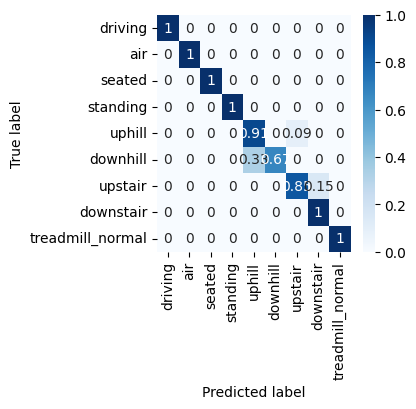

------------------------------------------------------------------
extended_model
5/5 [==============================] - 0s 3ms/step


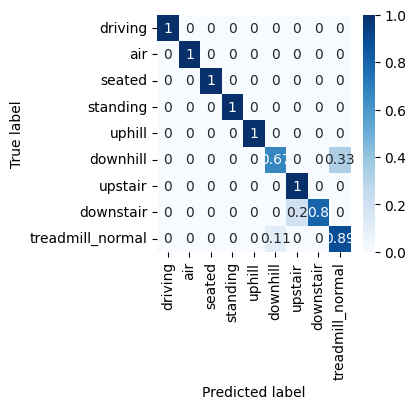

------------------------------------------------------------------
cnn_model
5/5 [==============================] - 1s 12ms/step


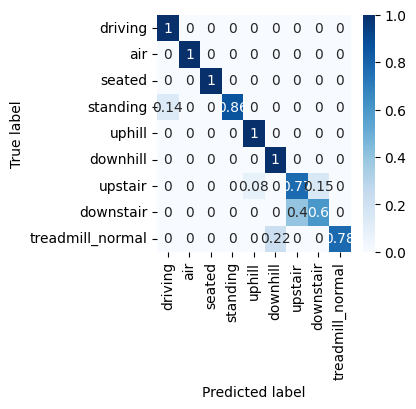

------------------------------------------------------------------
gru_model
5/5 [==============================] - 1s 19ms/step


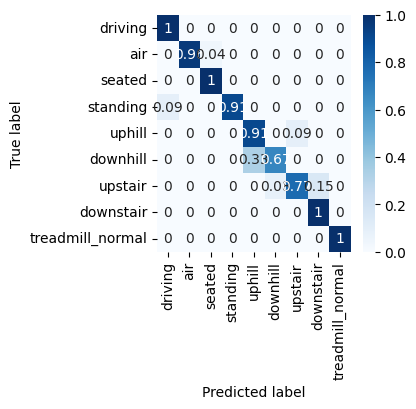

------------------------------------------------------------------
blstm_model
5/5 [==============================] - 3s 28ms/step


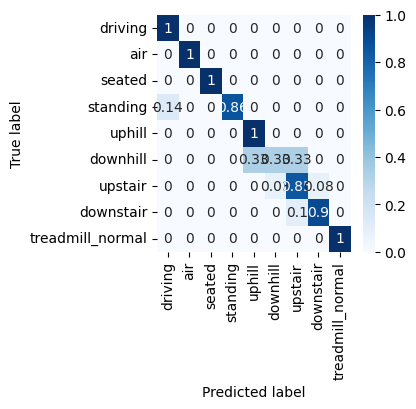

In [ ]:
for i, model in enumerate (models_name_list):
  print("------------------------------------------------------------------")
  print(models_str_list[i])

  y_true = test_labels
  predict_x = model.predict(test_inputs)
  y_pred = np.argmax(predict_x, axis=1)

  #classes=[0,1,2,3,4,5,6,7]
  classes = GESTURES

  con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                      index = classes,
                      columns = classes)

# inorder to capture enlarge the size of figures to 8x8
  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

------------------------------------------------------------------
basic_model
5/5 [==============================] - 0s 3ms/step


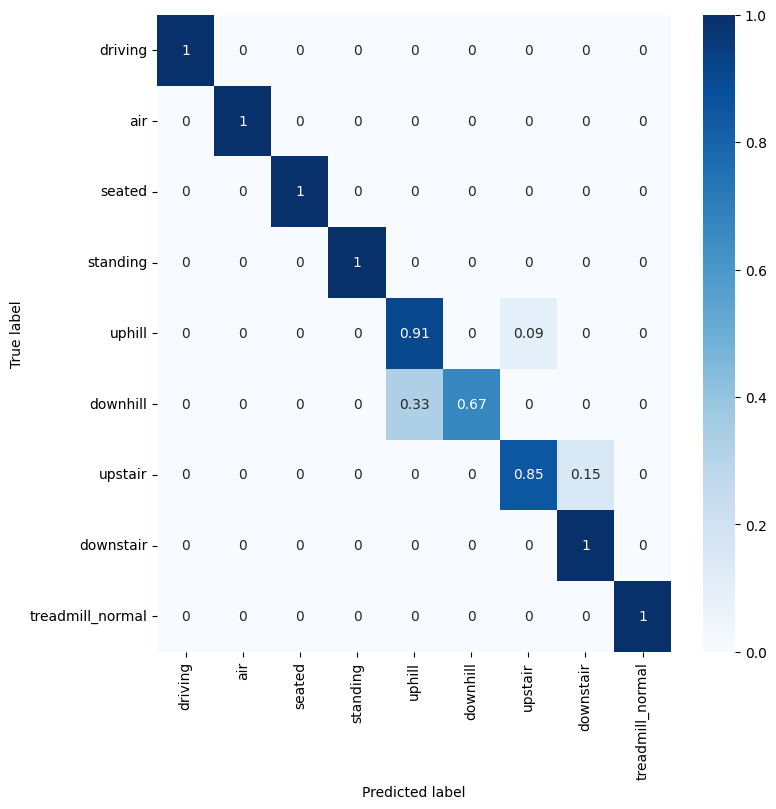

------------------------------------------------------------------
extended_model
5/5 [==============================] - 0s 4ms/step


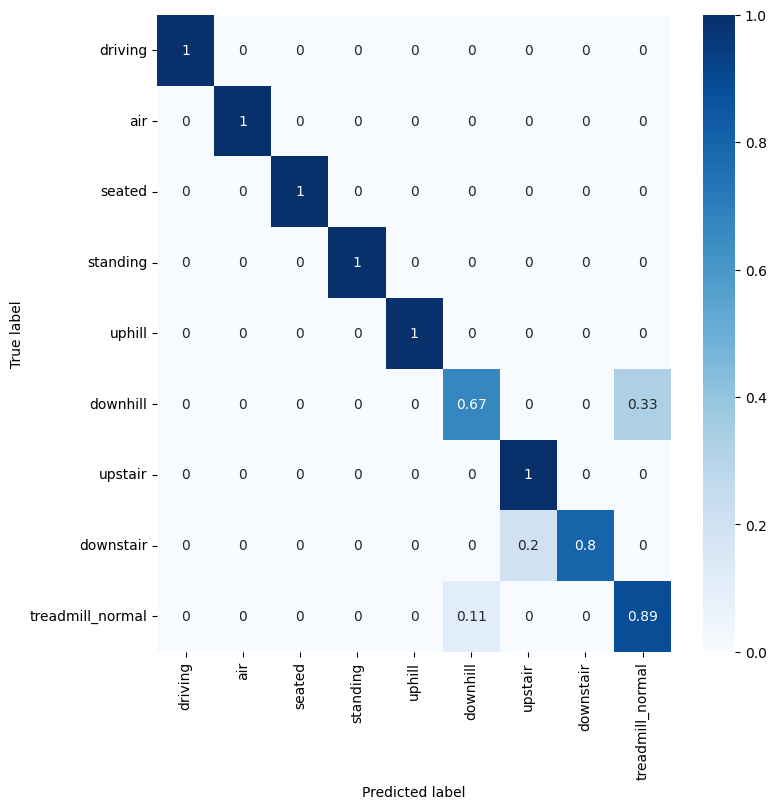

------------------------------------------------------------------
cnn_model
5/5 [==============================] - 0s 26ms/step


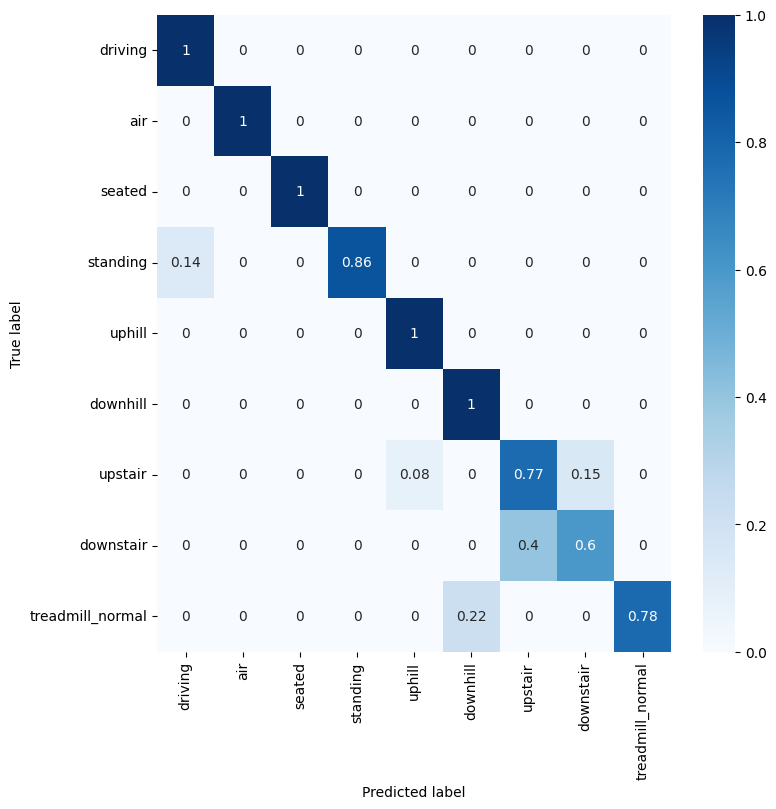

------------------------------------------------------------------
gru_model
5/5 [==============================] - 0s 17ms/step


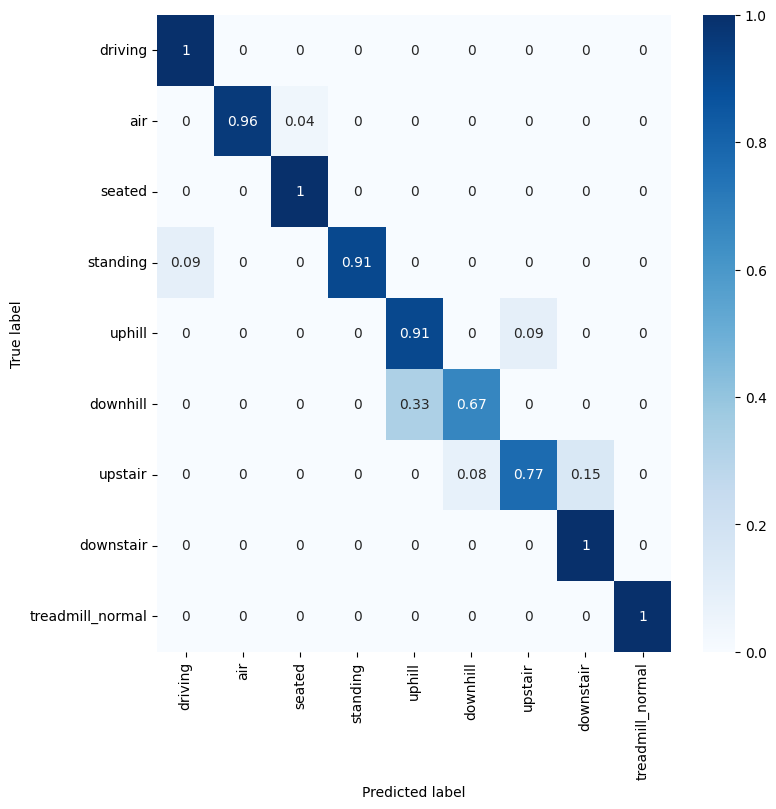

------------------------------------------------------------------
blstm_model
5/5 [==============================] - 0s 29ms/step


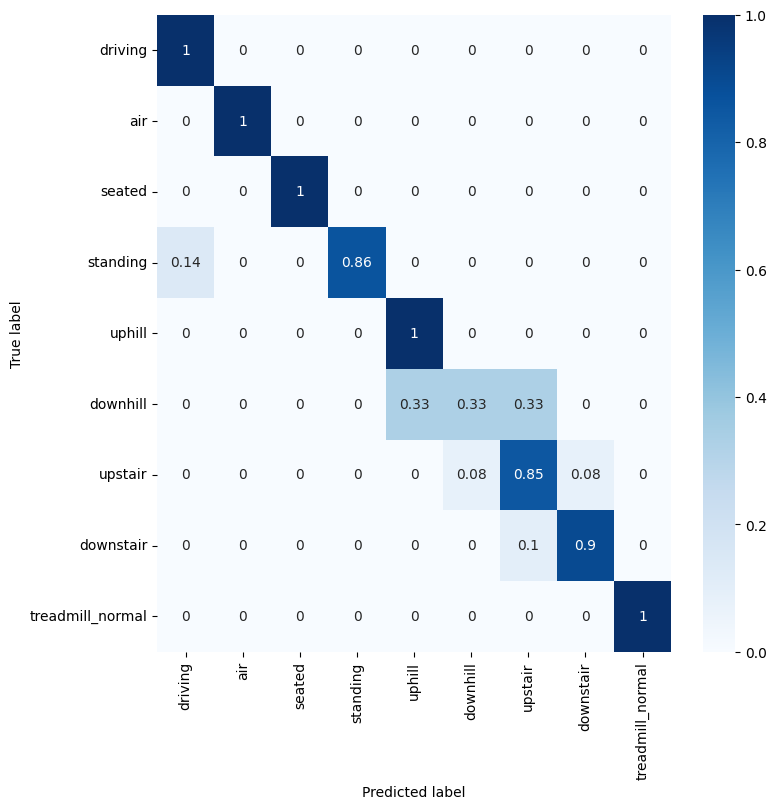

In [ ]:
for i, model in enumerate (models_name_list):
  print("------------------------------------------------------------------")
  print(models_str_list[i])

  y_true = test_labels
  predict_x = model.predict(test_inputs)
  y_pred = np.argmax(predict_x, axis=1)

  #classes=[0,1,2,3,4,5,6,7]
  classes = GESTURES

  con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                      index = classes,
                      columns = classes)

# inorder to capture enlarge the size of figures to 8x8
  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

### Graph the loss (optional)

Graph the loss to see when the model stops improving.

In [ ]:
#from sklearn.model_selection import cross_validate
models_str_list = ["basic_model", "extended_model", "cnn_model", "gru_model", "blstm_model"]
history_name_list = [basic_history, extended_history, cnn_history, gru_history, blstm_history]


for i, history in enumerate (history_name_list):
  print("------------------------------------------------------------------")
  print(models_str_list[i])

  # increase the size of the graphs. The default size is (6,4).
  plt.rcParams["figure.figsize"] = (10,5)

  # graph the loss, the model above is configure to use "mean squared error" as the loss function
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'g.', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  print(plt.rcParams["figure.figsize"])

### Run with Test Data (optional)
Put our test data into the model and plot the predictions


In [ ]:
#from sklearn.model_selection import cross_validate


for i, model in enumerate (models_name_list):
  print("------------------------------------------------------------------")
  print(models_str_list[i])
  model.evaluate(test_inputs)

  # use the model to predict the test inputs
  predictions = model.predict(test_inputs)

  # print the predictions and the expected ouputs
  print("predictions =\n", np.round(predictions, decimals=3))
  print("actual =\n", test_labels)


------------------------------------------------------------------
basic_model
5/5 [==============================] - 0s 3ms/step
predictions =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
actual =
 [3 3 1 2 1 6 1 1 7 1 6 8 3 2 3 0 0 1 2 3 1 7 8 2 8 5 0 8 3 2 6 3 3 8 8 0 2
 4 6 5 0 3 1 2 3 3 2 3 0 8 0 2 4 4 6 0 6 1 7 2 3 1 1 0 1 1 1 3 3 0 1 6 6 2
 1 4 0 2 4 4 3 0 2 8 0 6 3 2 2 4 1 2 6 7 0 1 2 0 3 1 6 4 6 7 3 4 1 4 4 2 0
 3 1 6 7 7 8 0 0 5 2 7 3 7 0 1 3 7 1 2 2 2 2 1 0]
------------------------------------------------------------------
extended_model
5/5 [==============================] - 0s 3ms/step
predictions =
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
actual =
 [3 3 1 2 1 6 1 1 7 1 6 8 3 2 3 0 0 1 2 3 1 7 8 2 8 5 0 8 3 2 6 3 3 8 8 0 2
 4 6 5 0 3 1 2 3 3 2 3 0 